# Asg 11a - Sin wave prediction

### Start by running all the cells in this notebook.

Inport the main libraries including the keras libraries we need. <br>
Note: keras has FutureWarning error message. That is OK


In [98]:
import numpy as np # linear algebra
import pandas # data processing, CSV file I/O (e.g. pandas.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM, SimpleRNN
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

# Generate the samples from the sin() function
np.arrange generates numbers between 0 andt the number of samples
np.linspace(start value, end value, number of values

In [100]:
numberSamples = 1000    # Generate 5000 values of the sin() function
ValueMax = 50           # numbers will be from sin(0) to sin(ValueMax)
numericSamples = np.arange(numberSamples)
timeSamples = np.linspace(0,ValueMax,numberSamples)
print ("First 10 numbers in numericSamples: ", numericSamples[:10])
print ("First 10 numbers in timeSamples:", timeSamples[:10])
sinSamples = np.sin(timeSamples)
print ("First 10 numbers is sin Samples", sinSamples[:10])

First 10 numbers in numericSamples:  [0 1 2 3 4 5 6 7 8 9]
First 10 numbers in timeSamples: [0.         0.05005005 0.1001001  0.15015015 0.2002002  0.25025025
 0.3003003  0.35035035 0.4004004  0.45045045]
First 10 numbers is sin Samples [0.         0.05002916 0.09993302 0.14958659 0.19886554 0.24764642
 0.29580708 0.3432269  0.3897871  0.4353711 ]


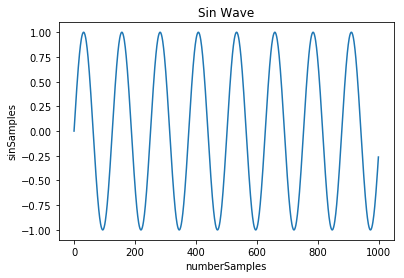

In [101]:
from matplotlib import pyplot as plt
plt.plot(sinSamples)
plt.title('Sin Wave')
plt.ylabel('sinSamples')
plt.xlabel('numberSamples')
plt.show()

# Setup Training and Testing data
The graph above shows the time series our network will try to predict and generate. <br>
Split the data into a training sequence and a testing sequence

In [102]:
# split into train and test sets with 70% for training
train_size = int(len(sinSamples) * 0.70)
test_size = len(sinSamples) - train_size
sin_train = sinSamples[0:train_size]
sin_test  = sinSamples[train_size:len(sinSamples)]
print ("train shape : " , sin_train.shape)
print ("test shape : " , sin_test.shape)




train shape :  (700,)
test shape :  (300,)


Break the long sequences into many shorter sequences for training and testing.
The to_sequence() function breaks a long sequence into shorter ones with corresponding output predicted one ahead.<br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]<br>
converted to <br>
[1, 2, 3] and [4]<br>
[2, 3, 4] and [5]<br>
[3, 4, 5] and [6]<br>


In [103]:
def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    

In [104]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,sin_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,sin_test)

print("Shape of training input set: {}".format(x_train.shape))
print("Shape of training output set: {}".format(y_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training input set: (689, 10, 1)
Shape of training output set: (689,)
Shape of test set: (289, 10, 1)


In [105]:
print ("First training sequence input: ",x_train[0])
print ("First training sequence outout is next number in the data: ",y_train[0])

First training sequence input:  [[0.        ]
 [0.05002916]
 [0.09993302]
 [0.14958659]
 [0.19886554]
 [0.24764642]
 [0.29580708]
 [0.3432269 ]
 [0.3897871 ]
 [0.4353711 ]]
First training sequence outout is next number in the data:  0.4798647090490943


# Build the Neural Network model in Keras

Build model and then train on training data and test on testin data
<br>
Model breaks long sequence up into many small 10 value sequences. Input is single input at time t and predicts single output at time t+1. There are 689 sequences for training, each 10 values long.



In [106]:
print(x_train.shape)

(689, 10, 1)


In [107]:
print('Build LSTM model...')
LSTMmodel = Sequential()
LSTMmodel.add(LSTM(32, input_shape=(None, 1)))                            # LSTM layer stores time state from inputs
#LSTMmodel.add(LSTM(32, input_shape=(None, 1), return_sequences=True))   # LSTM layer input layer if next layer is also a LSTM
#LSTMmodel.add(LSTM(20))                                                  # Optional second LSTM layer for longer time relation
#LSTMmodel.add(Dense(16))                                                 # Add another fully connected dense layer if needed
LSTMmodel.add(Dense(1))
LSTMmodel.compile(loss='mean_squared_error', optimizer='adam')


Build LSTM model...


In [108]:
print('Build RNN model...')
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(32, input_shape=(None, 1)))                   # Simple Recurrent Network layer stores time state from inputs
#RNNmodel.add(Dense(10))                                             # Add another fully connected dense layer if needed
RNNmodel.add(Dense(1))
RNNmodel.compile(loss='mean_squared_error', optimizer='adam')

Build RNN model...


# Task 1: Changing training time
Run the notebook as is, with 10 epochs. Note how arrurate prediction and generation graphs are
for both LSTM and simple RNN networks.  <br>
Increase the number of epochs, 40-100 is a good range. See in prediction and generation graphs below improve for LSTM and/or RNN.

In [109]:
LSTMresults = LSTMmodel.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=1,epochs=10)

Train on 689 samples, validate on 289 samples
Epoch 1/10
689/689 [==============================] - 1s 2ms/step - loss: 0.2895 - val_loss: 0.0893
Epoch 2/10
689/689 [==============================] - 0s 159us/step - loss: 0.0460 - val_loss: 0.0375
Epoch 3/10
689/689 [==============================] - 0s 143us/step - loss: 0.0326 - val_loss: 0.0287
Epoch 4/10
689/689 [==============================] - 0s 132us/step - loss: 0.0292 - val_loss: 0.0264
Epoch 5/10
689/689 [==============================] - 0s 137us/step - loss: 0.0274 - val_loss: 0.0251
Epoch 6/10
689/689 [==============================] - 0s 140us/step - loss: 0.0258 - val_loss: 0.0233
Epoch 7/10
689/689 [==============================] - 0s 146us/step - loss: 0.0237 - val_loss: 0.0217
Epoch 8/10
689/689 [==============================] - 0s 141us/step - loss: 0.0221 - val_loss: 0.0199
Epoch 9/10
689/689 [==============================] - 0s 134us/step - loss: 0.0203 - val_loss: 0.0183
Epoch 10/10
689/689 [=================

In [110]:
RNNresults = RNNmodel.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=1,epochs=10)

Train on 689 samples, validate on 289 samples
Epoch 1/10
689/689 [==============================] - 1s 911us/step - loss: 0.2044 - val_loss: 0.0305
Epoch 2/10
689/689 [==============================] - 0s 61us/step - loss: 0.0223 - val_loss: 0.0099
Epoch 3/10
689/689 [==============================] - 0s 58us/step - loss: 0.0050 - val_loss: 0.0024
Epoch 4/10
689/689 [==============================] - 0s 57us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 5/10
689/689 [==============================] - 0s 55us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 6/10
689/689 [==============================] - 0s 58us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 7/10
689/689 [==============================] - 0s 55us/step - loss: 0.0015 - val_loss: 0.0017
Epoch 8/10
689/689 [==============================] - 0s 60us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/10
689/689 [==============================] - 0s 57us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/10
689/689 [=======================

In [111]:
LSTMtrainPredict = LSTMmodel.predict(x_train)
LSTMtestPredict = LSTMmodel.predict(x_test)
RNNtrainPredict = RNNmodel.predict(x_train)
RNNtestPredict = RNNmodel.predict(x_test)

# Plot original values and predictions

Original (truth) values are shown in dotted line. <br>
Results of prediction **one time step ahead** are shown with the training data in orange, while testing data is shown in green. <br>
If network is predicting well, the dotted line and solid lines should be on top of each other.

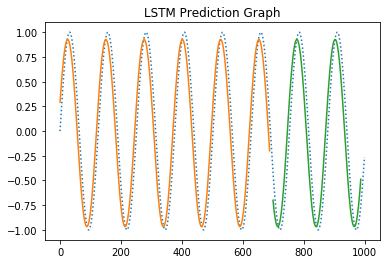

In [112]:
from matplotlib import pyplot as plt
# plot baseline and predictions
plt.title('LSTM Prediction Graph')
plt.plot(sinSamples, linestyle=':')
plt.plot(LSTMtrainPredict)
list = np.arange(len(LSTMtrainPredict)+10,len(LSTMtrainPredict)+len(LSTMtestPredict)+10)
plt.plot(list,LSTMtestPredict)

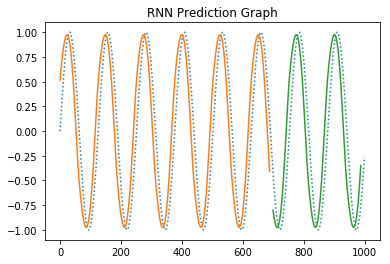

In [113]:
from matplotlib import pyplot as plt
# plot baseline and predictions
plt.title('RNN Prediction Graph')
plt.plot(sinSamples, linestyle=':')
plt.plot(RNNtrainPredict)
list = np.arange(len(RNNtrainPredict)+10,len(RNNtrainPredict)+len(RNNtestPredict)+10)
plt.plot(list,RNNtestPredict)

# Generate a sequence from the model
Starting with a short sequence, the model will try to generate a sequence of 2000 numbers. <br>
This is much harder. Predicting the weather one hour ahead is easy, redicting the hourly weather for the next 2000 hours is hard.

In [114]:
PREDICTION_LENGTH = 2000
pattern = x_test[1]
pattern = pattern.reshape(1,SEQUENCE_SIZE,1)
prediction = pattern
for i in range(PREDICTION_LENGTH):
    next = LSTMmodel.predict(pattern)
    nextNum = next[0]
    #print("Next number: ", nextNum)
    pattern = np.append(pattern, nextNum)
    prediction = np.append(prediction, nextNum)
    pattern = pattern[1:len(pattern)]
    pattern = pattern.reshape(1,SEQUENCE_SIZE,1)

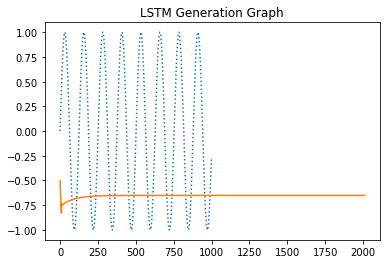

In [115]:
from matplotlib import pyplot as plt
# plot baseline and gereration 
plt.title('LSTM Generation Graph')
plt.plot(sinSamples, linestyle=':')
plt.plot(prediction)


In [116]:
PREDICTION_LENGTH = 2000
RNNpattern = x_test[1]
RNNpattern = RNNpattern.reshape(1,SEQUENCE_SIZE,1)
RNNprediction = RNNpattern
for i in range(PREDICTION_LENGTH):
    RNNnext =RNNmodel.predict(RNNpattern)
    RNNnextNum = RNNnext[0]
    #print("Next number: ", RNNnextNum)
    RNNpattern = np.append(RNNpattern, RNNnextNum)
    RNNprediction = np.append(RNNprediction, RNNnextNum)
    RNNpattern = RNNpattern[1:len(RNNpattern)]
    RNNpattern = RNNpattern.reshape(1,SEQUENCE_SIZE,1)

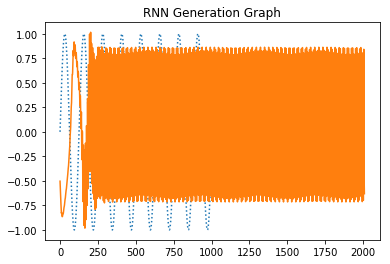

In [117]:
from matplotlib import pyplot as plt
# plot baseline and gereration 
plt.title('RNN Generation Graph')
plt.plot(sinSamples, linestyle=':')
plt.plot(RNNprediction)


# Task 2: Long term changes
Go to the third cell from the top and change the variable **ValueMax** from 50 to 10.<br>
This will stretch out the sin data making it harder to predict and generate. The network will have to remember things longer to predict them. <br>
Re-run all the cells in the network and compare how LSTM and RNN do for prediction 1-step ahead and generating a time series.<br>
Make **one** of the following modifications to the network to see if it improves the performance:
1. Increase the SEQUENCE_SIZE from 10 to 50 or more. This allows the network to build a better state when training
2. Add a second LSTM or RNN layer. Sometimes this helps, but requires adding return_sequences=True to the first layer
3. Add another dense hidden layer. The final, dense output layer must have a size of 1, but you can add earlier layers.